In [1]:
%matplotlib inline
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import math
from mpl_toolkits.basemap import Basemap
from itertools import chain
#sns.set_context("notebook", font_scale=1.5)
#plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
#tracks = pd.read_csv("tracks.csv",low_memory = False)
#genres = pd.read_csv("genres.csv",low_memory = False)
#features = pd.read_csv("features.csv",low_memory = False)
#echonest = pd.read_csv("echonest.csv",low_memory = False)
#tracks.shape, genres.shape, features.shape, echonest.shape

In [3]:
artist = pd.read_csv("raw_artists.csv",low_memory = False)

In [4]:
date_created = artist[['artist_date_created']]

In [5]:
location = []
for index, row in artist.iterrows():
    if math.isnan(row['artist_latitude']):
        continue
    elif math.isnan(row['artist_longitude']):
        continue
    elif row['tags'] == '[]':
        continue
    else:
        location.append((row['artist_longitude'],row['artist_latitude'],row['tags'])) 

In [6]:
artist[['tags']]

,tags
0,['awol']
1,['lucky dragons']
2,['chandeliers']
3,[]
4,['jack hertz phobos blue hell']
5,['nick rivera']
6,['carlos ramirez']
7,['evening fires']
8,['tabla y cuchillo']
9,['blank realm']


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


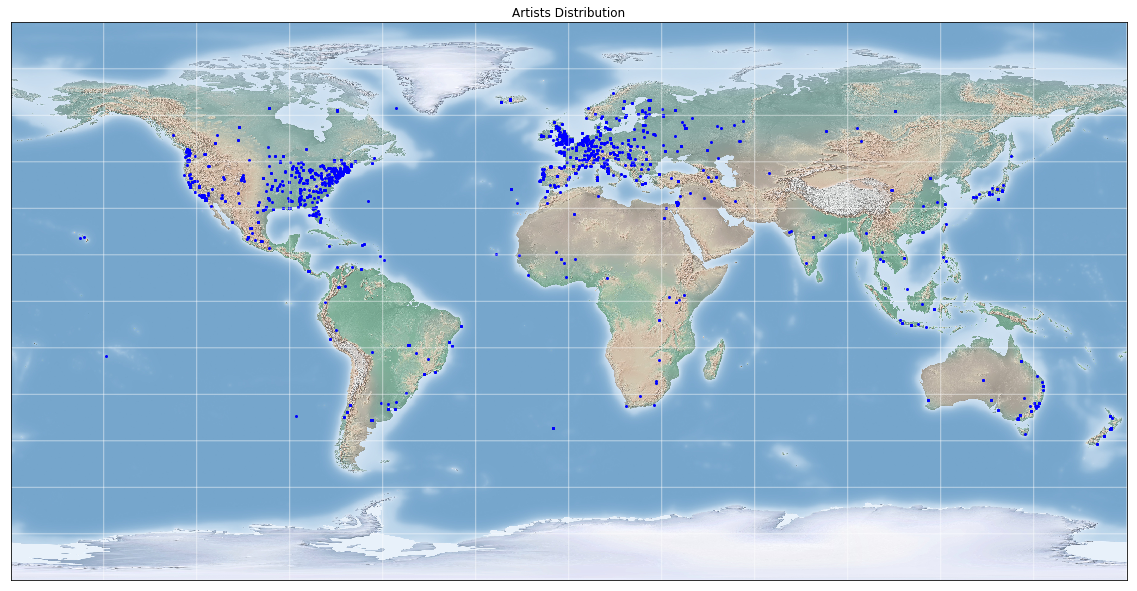

In [7]:
def draw_map(m, scale=0.5):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.5, color='w')
fig = plt.figure(figsize=(20,25), edgecolor='w')
plt.title("Artists Distribution")
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

lons = []
lats = []
for i in location:
    lons.append(i[0])
    lats.append(i[1])
x,y = m(lons, lats)
m.plot(x, y, 'bo', markersize=2)
draw_map(m)

In [8]:
date_count = {}
for index, row in date_created.iterrows():
    time_list = row['artist_date_created'].split()
    if time_list[0] not in date_count:
        date_count[time_list[0]] = 1
    else:
        date_count[time_list[0]] += 1

In [9]:
number_count = {}
for i in date_count.values():
    if i not in number_count.keys():
        number_count[i] = 1
    else:
        number_count[i] +=1

In [10]:
days = number_count.keys()
counts = number_count.values()

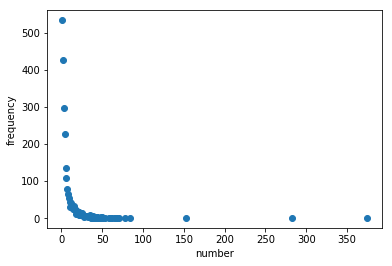

In [11]:
days = number_count.keys()
counts = number_count.values()
plt.xlabel('number')
plt.ylabel('frequency')
plt.scatter(days,counts)
plt.show()

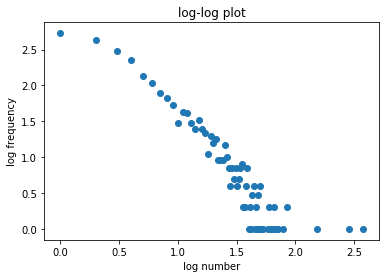

In [12]:
logdays = []
logcounts = []
for i in days:
    x = np.log10(i)
    logdays.append(x)
for j in counts:
    y = np.log10(j)
    logcounts.append(y)
plt.title('log-log plot')
plt.xlabel('log number')
plt.ylabel('log frequency')
plt.scatter(logdays,logcounts)
plt.show()

In [13]:
newdays = []
newcounts = []
for i in range(len(logdays)):
    if logdays[i] < 3:
        newdays.append(logdays[i])
        newcounts.append(logcounts[i])

In [14]:
from scipy.stats import linregress
from scipy import stats
slope,intercept, r_value, p_value, std_err = stats.linregress(logdays,logcounts)

In [15]:
r = np.linspace(0, 2, num=50)
y = []
for i in r:
    e = intercept+slope*i
    y.append(e)

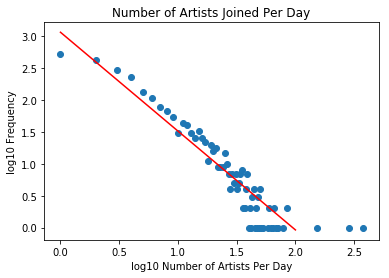

In [16]:
plt.scatter(logdays,logcounts)
plt.plot(r, y, 'r')
plt.title('Number of Artists Joined Per Day')
plt.xlabel('log10 Number of Artists Per Day')
plt.ylabel('log10 Frequency')
plt.show()

In [17]:
from datetime import date
import time

In [18]:
date_list = list(date_count.keys())
time_count = {}
for i in date_list:
    d = i.split('/')
    year = int(d[2])
    month = int(d[0])
    day = int(d[1])
    time_count[date(year,month,day)] = date_count[i]

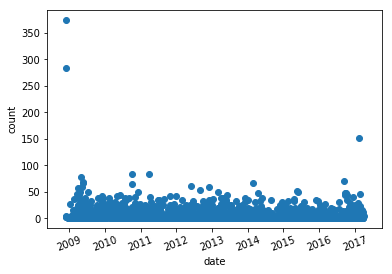

In [19]:
x = list(time_count.keys())
y = list(time_count.values())
plt.xticks(rotation=20)
plt.scatter(x,y)
plt.xlabel('date')
plt.ylabel('count')
plt.show()

In [20]:
year_count = {}
for i in date_count.keys():
    spl = i.split('/')
    year = spl[2]
    if year not in year_count.keys():
        year_count[year] = date_count[i]
    else:
        year_count[year] = year_count[year] + date_count[i]

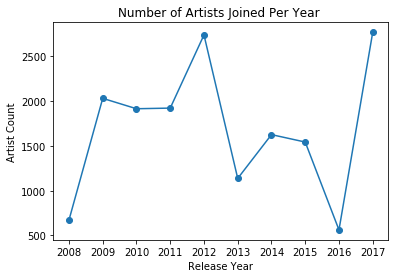

In [21]:
x = list(year_count.keys())
x.sort()
y = list(year_count.values())
plt.scatter(x,y)
plt.plot(x,y)
plt.title('Number of Artists Joined Per Year ')
plt.xlabel('Release Year')
plt.ylabel('Artist Count')
plt.show()

In [22]:
cols = artist.columns

In [23]:
cols

Index(['artist_id', 'artist_active_year_begin', 'artist_active_year_end',
       'artist_associated_labels', 'artist_bio', 'artist_comments',
       'artist_contact', 'artist_date_created', 'artist_donation_url',
       'artist_favorites', 'artist_flattr_name', 'artist_handle',
       'artist_image_file', 'artist_images', 'artist_latitude',
       'artist_location', 'artist_longitude', 'artist_members', 'artist_name',
       'artist_paypal_name', 'artist_related_projects', 'artist_url',
       'artist_website', 'artist_wikipedia_page', 'tags'],
      dtype='object')

In [24]:
active = {}
for index, row in artist.iterrows():
    if math.isnan(row['artist_active_year_begin']):
        continue
    elif math.isnan(row['artist_active_year_end']):
        continue
    elif row['artist_active_year_end'] == 0.0:
        continue
    elif row['artist_active_year_begin'] == 0.0:
        continue
    else:
        active[row['artist_id']] = (row['artist_active_year_begin'],row['artist_active_year_end'])

In [25]:
active_year = []
for i in active.keys():
    begin = active[i][0]
    end = active[i][1]
    active_year.append(end-begin)

In [26]:
year_count = {}
for i in active_year:
    if i not in year_count.keys():
        year_count[i] = 1
    else:
        year_count[i] = year_count[i] + 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


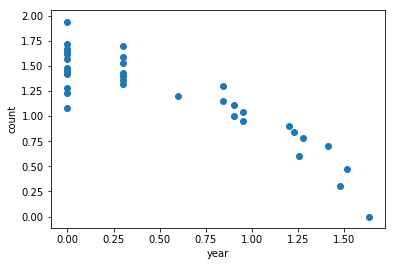

In [27]:
count = list(year_count.keys())
year = list(year_count.values())
plt.scatter(np.log10(year),np.log10(count))
plt.xlabel('year')
plt.ylabel('count')
plt.show()

## Analyze the datasets

In [28]:
%matplotlib inline
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import utils
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.metrics import classification_report

In [29]:
# Load metadata and features.
#tracks = utils.load('tracks.csv')
genres = utils.load('genres.csv')
features = utils.load('features.csv')
echonest = utils.load('echonest.csv')

### Feature

In [30]:
print('{} top-level genres'.format(len(genres['top_level'].unique())))
genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)

16 top-level genres


,#tracks,parent,title,top_level
genre_id,,,,
38,38154,0,Experimental,38
15,34413,0,Electronic,15
12,32923,0,Rock,12
1235,14938,0,Instrumental,1235
10,13845,0,Pop,10
17,12706,0,Folk,17
21,8389,0,Hip-Hop,21
2,5271,0,International,2
4,4126,0,Jazz,4


In [31]:
tracks = pd.read_csv("tracks.csv",index_col = 0, header = [0,1])

In [32]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

height has been deprecated.



In [33]:
mfc = features['mfcc']
mfc = mfc.join(tracks.track.genre_top)
mfc = mfc[pd.notnull(mfc.genre_top)]

/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [34]:
genre = dict()
for index, row in mfc.iterrows():
    if row['genre_top'] not in genre.keys():
        genre[row['genre_top']] = 1
    else:
        genre[row['genre_top']] += 1

In [35]:
x = list(genre.keys())
y = list(genre.values())

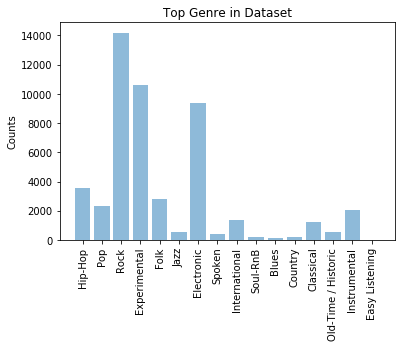

In [36]:
objects = x
y_pos = np.arange(len(objects))
performance = y
 
plt.bar(y_pos, performance, alpha=0.5)
plt.xticks(y_pos, objects,rotation='vertical')
plt.ylabel('Counts')
plt.title('Top Genre in Dataset')
 
plt.show()

Transform the string to integer

In [37]:
number = preprocessing.LabelEncoder()
mfc['genre_top'] = number.fit_transform(mfc.genre_top)

Do the Normalization 

In [38]:
dataset = mfc
dataset = mfc.values

X = dataset[:,0:dataset.shape[1] - 1]
#last column is the target
y = dataset[:,dataset.shape[1] - 1:dataset.shape[1]]
# Standardize data
standardized_X = preprocessing.scale(X)

Test-Train Split

In [39]:
X = pd.DataFrame(standardized_X)
y = pd.Series(y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0, stratify=y)

In [40]:
enc = OneHotEncoder()
train_onehot_output = enc.fit_transform(y_train.reshape(y_train.shape[0],1)).toarray()
test_onehot_output = enc.fit_transform(y_test.reshape(y_test.shape[0],1)).toarray()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


SVM Training

In [41]:
model = svm.SVC(kernel='sigmoid')
clf = model.fit(X_train, y_train)

In [42]:
clf.score(X_test, y_test)

0.4099798387096774

In [43]:
y_pred = clf.predict(X_test)

In [44]:
y_true = y_test
print(classification_report(y_true, y_pred,target_names = list(number.classes_)))

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        22
          Classical       0.31      0.21      0.25       246
            Country       0.00      0.00      0.00        39
     Easy Listening       0.00      0.00      0.00         5
         Electronic       0.33      0.57      0.42      1874
       Experimental       0.36      0.38      0.37      2122
               Folk       0.22      0.27      0.24       561
            Hip-Hop       0.44      0.28      0.34       710
       Instrumental       0.15      0.08      0.11       416
      International       0.37      0.05      0.09       278
               Jazz       0.00      0.00      0.00       114
Old-Time / Historic       0.23      0.25      0.24       111
                Pop       0.07      0.06      0.07       466
               Rock       0.70      0.60      0.64      2836
           Soul-RnB       0.00      0.00      0.00        35
             Spoken    

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
model = svm.SVC(kernel='rbf')
clf = model.fit(X_train, y_train)

In [46]:
clf.score(X_test, y_test)

0.64375

In [47]:
y_pred = clf.predict(X_test)

In [48]:
y_true = y_test
print(classification_report(y_true, y_pred,target_names = list(number.classes_)))

                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        22
          Classical       0.83      0.77      0.80       246
            Country       0.00      0.00      0.00        39
     Easy Listening       0.00      0.00      0.00         5
         Electronic       0.60      0.69      0.64      1874
       Experimental       0.54      0.70      0.61      2122
               Folk       0.62      0.54      0.58       561
            Hip-Hop       0.71      0.61      0.66       710
       Instrumental       0.56      0.18      0.27       416
      International       0.77      0.36      0.49       278
               Jazz       0.93      0.11      0.20       114
Old-Time / Historic       0.98      0.95      0.96       111
                Pop       0.71      0.05      0.10       466
               Rock       0.73      0.83      0.77      2836
           Soul-RnB       0.00      0.00      0.00        35
             Spoken    

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Liner Classification 

In [49]:
model = svm.LinearSVC()

In [50]:
clf = model.fit(X_train, y_train)

In [51]:
clf.score(X_test, y_test)

0.5626008064516129

MLP

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.advanced_activations import LeakyReLU, PReLU

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [53]:
model = Sequential()
model.add(Dense(128, activation='linear', input_dim=140))
model.add(LeakyReLU(alpha=.01)) 
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=.01)) 
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(16, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [54]:
model.fit(X_train, train_onehot_output, epochs = 30, batch_size= 128)

Epoch 1/30
39678/39678 [==============================] - 2s 41us/step - loss: 1.5139 - acc: 0.5271
Epoch 2/30
39678/39678 [==============================] - 1s 20us/step - loss: 1.2641 - acc: 0.5978
Epoch 3/30
39678/39678 [==============================] - 1s 20us/step - loss: 1.1933 - acc: 0.6168
Epoch 4/30
39678/39678 [==============================] - 1s 20us/step - loss: 1.1481 - acc: 0.6286
Epoch 5/30
39678/39678 [==============================] - 1s 20us/step - loss: 1.1157 - acc: 0.6409
Epoch 6/30
39678/39678 [==============================] - 1s 20us/step - loss: 1.0833 - acc: 0.6488
Epoch 7/30
39678/39678 [==============================] - 1s 20us/step - loss: 1.0540 - acc: 0.6577
Epoch 8/30
39678/39678 [==============================] - 1s 20us/step - loss: 1.0273 - acc: 0.6672
Epoch 9/30
39678/39678 [==============================] - 1s 20us/step - loss: 0.9981 - acc: 0.6749
Epoch 10/30
39678/39678 [==============================] - 1s 20us/step - loss: 0.9767 - acc: 0.6817

In [55]:
score = model.evaluate(X_test, test_onehot_output)
score[1]

9920/9920 [==============================] - 0s 22us/step


0.5883064516129032

KNN

In [57]:
model = sklearn.neighbors.KNeighborsClassifier()
clf = model.fit(X_train, y_train)
clf.score(X_test, y_test)

0.586491935483871

Plot the Classification Methods

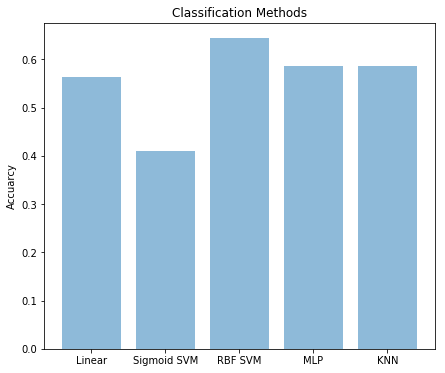

In [58]:
objects = ['Linear','Sigmoid SVM','RBF SVM','MLP','KNN']
y_pos = np.arange(len(objects))
performance = [0.5625,0.4099798387096774,0.64375,0.5867943548387097,0.586491935483871]
plt.figure(figsize=(7,6))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuarcy')
plt.title('Classification Methods')

 
plt.show()